In [1]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 2.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=673d81b8354d47de8867002c510fd16a6685b0758013c4fd95db9bd334140c50
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import japanize_matplotlib
from sklearn.preprocessing import StandardScaler

fruits = np.array([[200, 10],
                  [100, 30],
                  [200, 20],
                  [1000, 3],
                  [980, 10]])
standardized_fruits = StandardScaler().fit_transform(fruits)
print(standardized_fruits)
data = {"りんご":np.array([200, 10]),
        "みかん":np.array([100, 30]),
        "ばなな":np.array([200, 20]),
        "メロン":np.array([1000, 3]),
        "すいか":np.array([980, 10])}

[[-0.73077732 -0.48858818]
 [-0.97766156  1.63570826]
 [-0.73077732  0.57356004]
 [ 1.24429653 -1.23209194]
 [ 1.19491968 -0.48858818]]


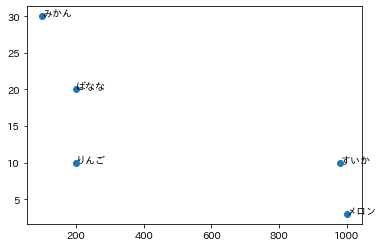

In [3]:
plt.scatter(fruits[:, 0], fruits[:, 1])
for k, (i, j) in enumerate(fruits):
    plt.annotate(list(data.keys())[k], xy=(i, j))

[[0.00000000e+00 2.00000000e+00 1.00000000e+01 2.00000000e+00]
 [3.00000000e+00 4.00000000e+00 2.11896201e+01 2.00000000e+00]
 [1.00000000e+00 5.00000000e+00 1.16761866e+02 3.00000000e+00]
 [6.00000000e+00 7.00000000e+00 1.27567397e+03 5.00000000e+00]]


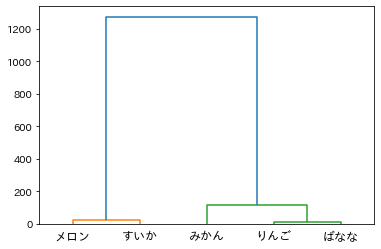

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
print(linkage(fruits, method="ward"))
#linkageの簡単な説明。１列目、２列目は元々のデータのインデックスに対応。３列目はそれらのデータのクラスタ間距離。４列目はクラスタ内のデータ数。
#わかりづらいのでdendrogram()を使うのが一般的.
dendrogram(linkage(fruits, method="ward"), labels=list(data.keys()))
plt.show()

[[3.         4.         0.74514153 2.        ]
 [0.         2.         1.06214822 2.        ]
 [1.         6.         1.86165132 3.        ]
 [5.         7.         3.85368131 5.        ]]


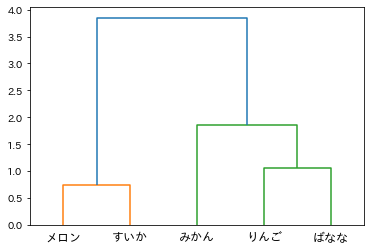

In [9]:
dendrogram(linkage(standardized_fruits, "ward"), labels=list(data.keys()))
print(linkage(standardized_fruits, "ward"))
plt.show()

In [ ]:
D_Fruits = scipy.spatial.distance.cdist(fruits, fruits)
df_D_Fruits = pd.DataFrame(D_Fruits, columns=list(data.keys()), index=list(data.keys()))
df_D_Fruits

,りんご,みかん,ばなな,メロン,すいか
りんご,0.000000,101.980390,10.000000,800.030624,780.000000
みかん,101.980390,0.000000,100.498756,900.404909,880.227243
ばなな,10.000000,100.498756,0.000000,800.180605,780.064100
メロン,800.030624,900.404909,800.180605,0.000000,21.189620
すいか,780.000000,880.227243,780.064100,21.189620,0.000000


In [ ]:
D_SFruits = scipy.spatial.distance.cdist(standardized_fruits, standardized_fruits)
df_D_SFruits = pd.DataFrame(D_SFruits, columns=list(data.keys()), index=list(data.keys()))
df_D_SFruits

,りんご,みかん,ばなな,メロン,すいか
りんご,0.000000,2.138595,1.062148,2.110383,1.925697
みかん,2.138595,0.000000,1.090464,3.627861,3.038543
ばなな,1.062148,1.090464,0.000000,2.676060,2.199197
メロン,2.110383,3.627861,2.676060,0.000000,0.745142
すいか,1.925697,3.038543,2.199197,0.745142,0.000000
